# CHURN PREDICTION FOR CONNECTTEL CUSTOMERS

In [1]:
# Import neccessary libraries

# Libraries for Data Analysis
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries (Machine learning algorithms)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Features in the Data and Meaning

1. CustomerID:A unique identifier assigned to each telecom customer, enabling
tracking and identification of individual customers.

2. Gender:The gender of the customer, which can be categorized as male, or
female. This information helps in analyzing gender based trends in
customer churn.

3. SeniorCitizen:A binary indicator that identifies whether the customer is a senior citizen
or not. This attribute helps in understanding if there are any specific
churn patterns among senior customers.

4. Partner:Indicates whether the customer has a partner or not. This attribute helps
in evaluating the impact of having a partner on churn behavior.

5. Dependents:Indicates whether the customer has dependents or not. This attribute
helps in assessing the influence of having dependents on customer
churn.

6. Tenure:The duration for which the customer has been subscribed to the telecom
service. It represents the loyalty or longevity of the customer’s
relationship with the company and is a significant predictor of churn.

7. PhoneService:Indicates whether the customer has a phone service or not. This attribute
helps in understanding the impact of phone service on churn.

8. MultipleLines:Indicates whether the customer has multiple lines or not. This attribute helps in analyzing
the effect of having multiple lines on customer churn.

9. InternetService:Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic,
or no internet service. It helps in evaluating the relationship between internet service and
churn.

10. OnlineSecurity:Indicates whether the customer has online security services or not. This attribute helps in
analyzing the impact of online security on customer churn.

11. OnlineBackup:Indicates whether the customer has online backup services or not. This attribute helps in
evaluating the impact of online backup on churn behavior.

12. DeviceProtection:Indicates whether the customer has device protection services or not. This attribute helps
in understanding the influence of device protection on churn.

13. TechSupport:Indicates whether the customer has technical support services or not. This attribute helps
in assessing the impact of tech support on churn behavior.

14. StreamingTV:Indicates whether the customer has streaming TV services or not. This attribute helps in
evaluating the impact of streaming TV on customer churn.

15. StreamingMovies:Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence
of streaming movies on churn behavior.

16. Contract:Indicates the type of contract the customer has, such as a month to month, one year, or two year contract. It is a crucial
factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.

17. PaperlessBilling:Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of
paperless billing on customer churn.

18. PaymentMethod:Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit
cards. This attribute helps in evaluating the impact of payment methods on churn.

19. MonthlyCharges:The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly
charges and churn behavior.

20. TotalCharges:The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the
customer and may have an impact on churn.

21. Churn:
The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to
predict in telecom customer churn analysis.

### Data verification - Data type, number of features and rows, missing data, etc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.size

147903

In [7]:
df.ndim

2

## Statistical Analysis and Exploratory Data Analysis

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# CHECK FOR MISSING VALUES #Although we could see there is no missing values. but just checking
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### there is no missing data from our isnull function

In [10]:
# check for duplicates in our dataset
df.duplicated().sum()

0

In [11]:
#Check for unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### From here we could see the unique values. This will help me to group the categorical values in the dataset 

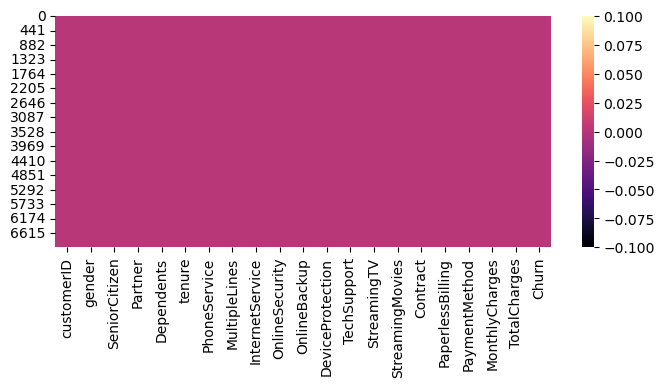

In [12]:
# Visualize if there is any missing values
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(), cbar=True, cmap='magma', color='b');

#### Checking the heatmap chart, there is no missing data. But I discovered there are redundant dataset that are not neccessary for our evaluation, example is the "Customer ID".

In [13]:
# Drop redundant dataset after checking for missing data and outliers, and duplicates

df.drop("customerID", axis=1, inplace=True)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#### Now the customerID column has been dropped



In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### All categorical data are now in numerical format. 

## Univariate Data Analysis



In [18]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

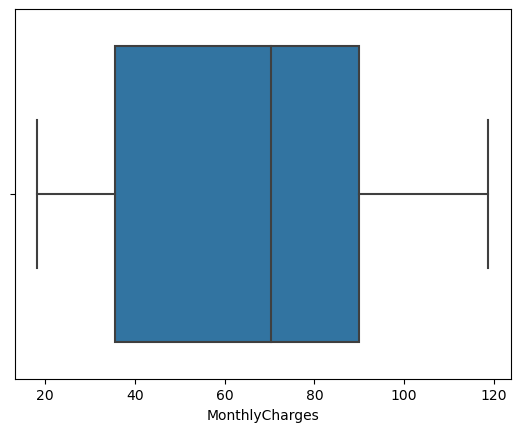

In [19]:
# Check for outliers
sns.boxplot(x=df['MonthlyCharges']);

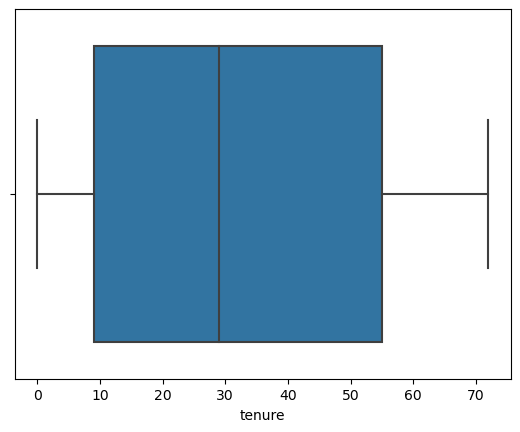

In [20]:
sns.boxplot(x=df['tenure']);

Text(0.5, 1.0, 'Total Number of Customers')

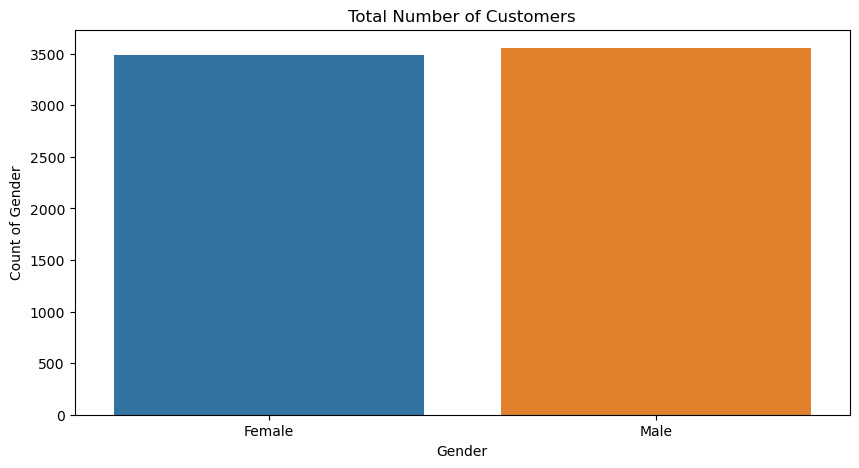

In [21]:
# Data visualizaito for gender

plt.figure(figsize = (10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Customers')

In [22]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Total Number of Citizens')

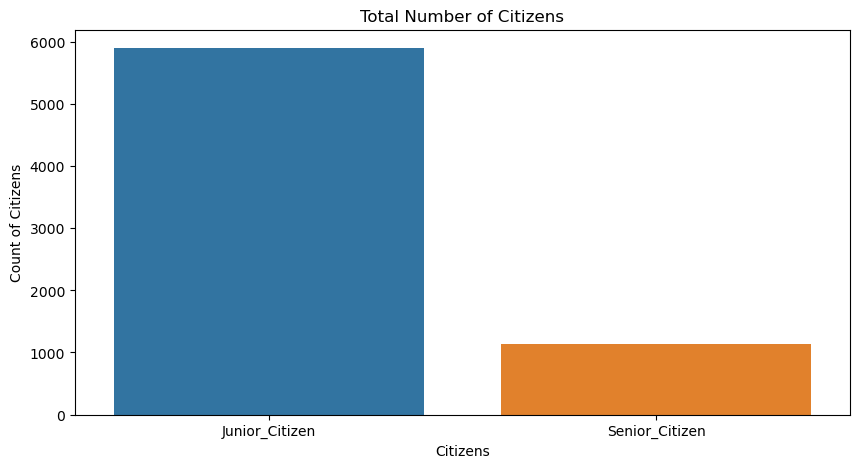

In [24]:
# Data visualizaito for SeniorCitizen

def SeniorCitizen(citizens):
    if citizens == 1:
        return 'Senior_Citizen'
    else:
        return 'Junior_Citizen'
    
# To create the new column of SeniorCitizen
df['citizens_cat']=df['SeniorCitizen'].apply(SeniorCitizen) 

plt.figure(figsize = (10,5))
sns.countplot(x='citizens_cat', data=df)
plt.xlabel('Citizens')
plt.ylabel('Count of Citizens')
plt.title('Total Number of Citizens')

In [25]:
df['citizens_cat'].value_counts()

Junior_Citizen    5901
Senior_Citizen    1142
Name: citizens_cat, dtype: int64

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,citizens_cat
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Junior_Citizen
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Junior_Citizen
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Junior_Citizen
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Junior_Citizen
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Junior_Citizen


Text(0.5, 1.0, 'Total Number of Customers that have partners')

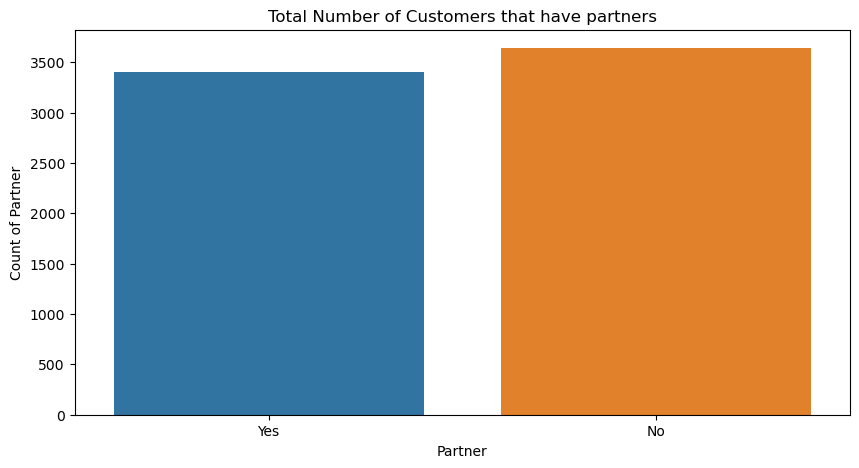

In [27]:
# Data visualizaito for Partner

plt.figure(figsize = (10,5))
sns.countplot(x='Partner', data=df)
plt.xlabel('Partner')
plt.ylabel('Count of Partner')
plt.title('Total Number of Customers that have partners')

In [28]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Text(0.5, 1.0, 'Total Number of Customers that have Dependents')

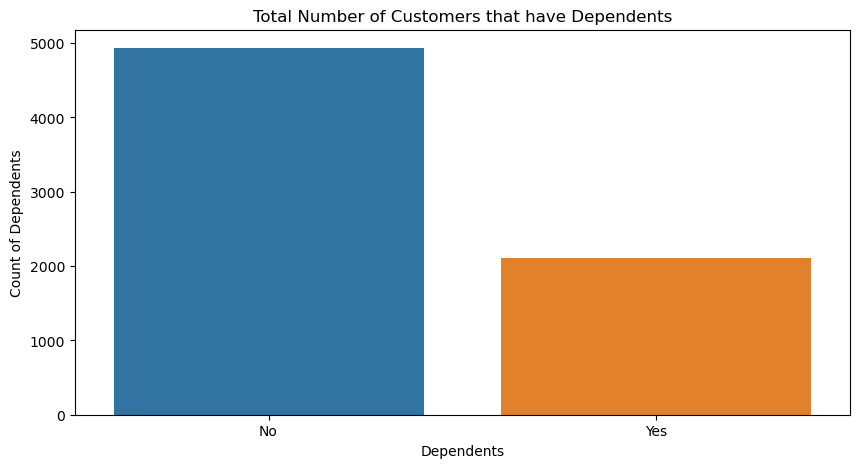

In [29]:
# Data visualizaito for Dependents

plt.figure(figsize = (10,5))
sns.countplot(x='Dependents', data=df)
plt.xlabel('Dependents')
plt.ylabel('Count of Dependents')
plt.title('Total Number of Customers that have Dependents')

In [30]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Text(0.5, 1.0, 'Total Number of Customers and their InternetService')

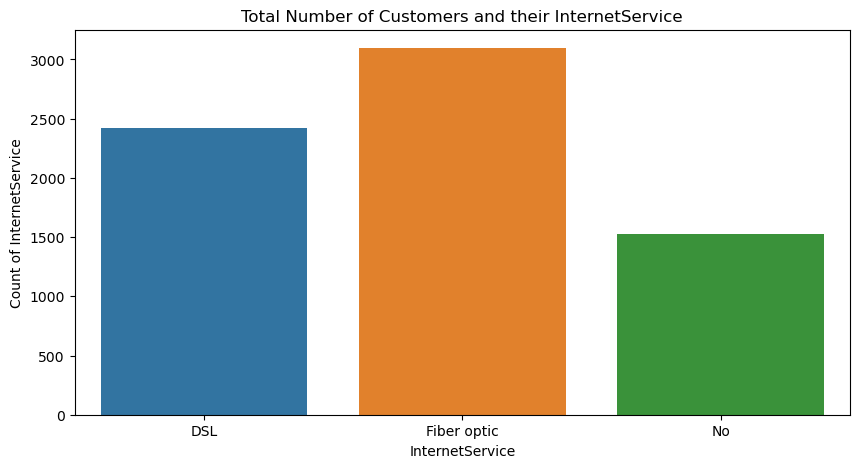

In [31]:
# Data visualizaito for InternetService

plt.figure(figsize = (10,5))
sns.countplot(x='InternetService', data=df)
plt.xlabel('InternetService')
plt.ylabel('Count of InternetService')
plt.title('Total Number of Customers and their InternetService')

In [32]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Text(0.5, 1.0, 'Types of Customers Contract')

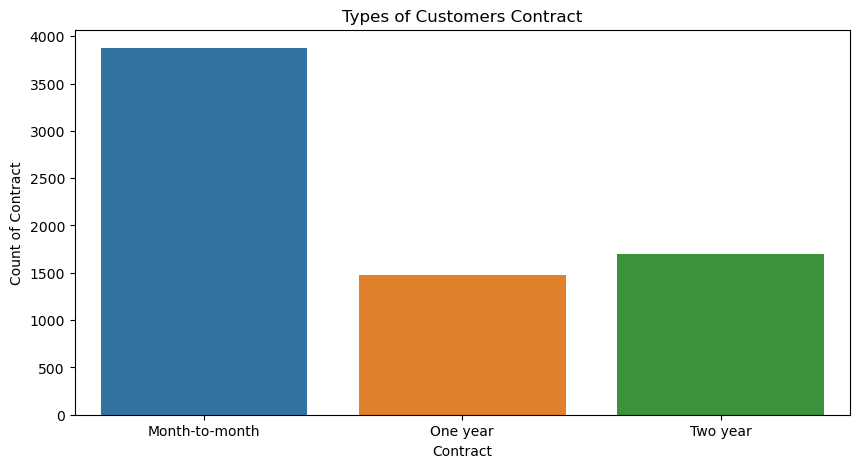

In [33]:
# Data visualizaito for Contract

plt.figure(figsize = (10,5))
sns.countplot(x='Contract', data=df)
plt.xlabel('Contract')
plt.ylabel('Count of Contract')
plt.title('Types of Customers Contract')

Text(0.5, 1.0, 'Types of Customers Payment Methods')

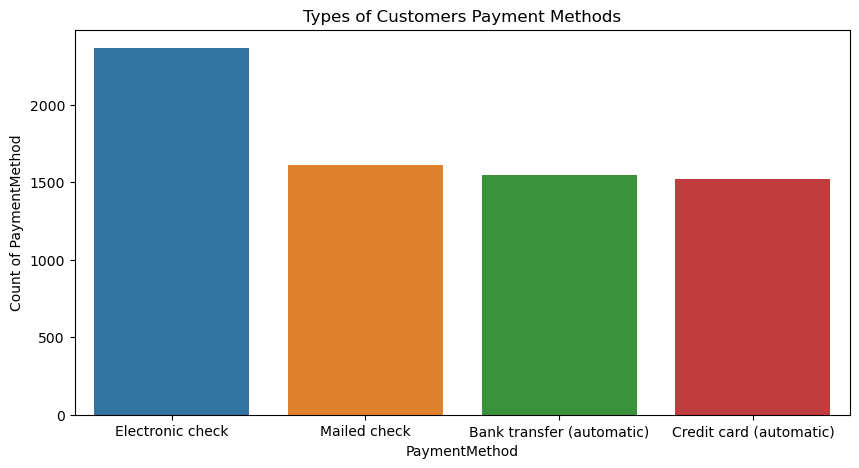

In [34]:
# Data visualizaito for PaymentMethod

plt.figure(figsize = (10,5))
sns.countplot(x='PaymentMethod', data=df)
plt.xlabel('PaymentMethod')
plt.ylabel('Count of PaymentMethod')
plt.title('Types of Customers Payment Methods')

In [35]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Text(0.5, 1.0, 'Total number of Churn Customers')

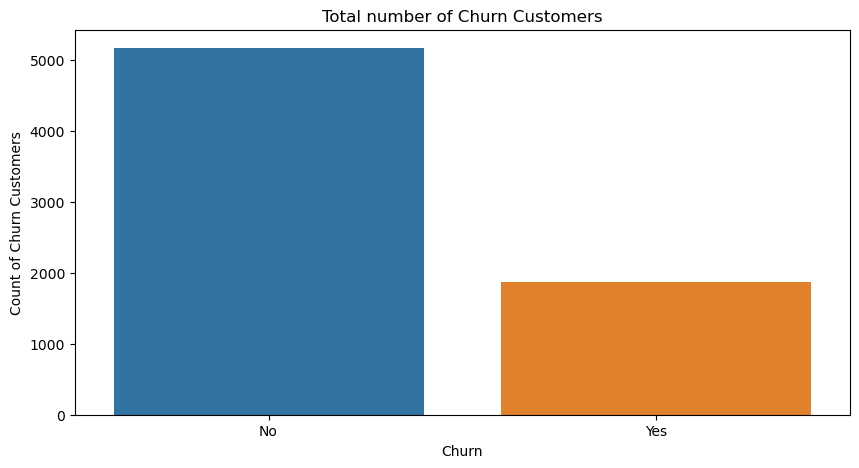

In [36]:
# Data visualizaito for Churn customers

plt.figure(figsize = (10,5))
sns.countplot(x='Churn', data=df)
plt.xlabel('Churn')
plt.ylabel('Count of Churn Customers')
plt.title('Total number of Churn Customers')

In [37]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

From the observations the number of churn customers is far weigh below the number of committed customers. 
while churn customers are 1869, the committed customers are 5174. 
we understand from our statistical and univariate analysis that we don't have outliers in the data and there are no missing value neither is there any duplicate data. 
I also observe that for the gender, we have 3555 Males and 3488 Females. therefore we have more male customers with a difference of 67. 
Additionally, for the Citizens Category, we have 5901 Junior_Citizens and 1142 Senior_Citizens.
Furthermore, considering customers that have partners and how it affect churn, we observed that 3641 customers have no partners and 3402 customers have partners. 
Moreso, we observed that 4933 customers have no dependents and 2110 customers have dependents with them. 
I also discovered the Total Number of Customers and their InternetService. Not all our customers uses internet services. those using Fiber optic having about 3096 users which is also the highest used internet service followed by DSL with 2421 users and 1526 of our customers uses no internet service. 
Another groundbreaking observation from the univariate analysis is the usage of payment method. we see that those using Electronic check are 2365 those using Mailed check are 1612, those using Bank transfer (automatic) are 1544, while those using Credit card (automatic) are 1522.           

## Bivariate Data Analysis

Text(0.5, 1.0, 'Gender against Church')

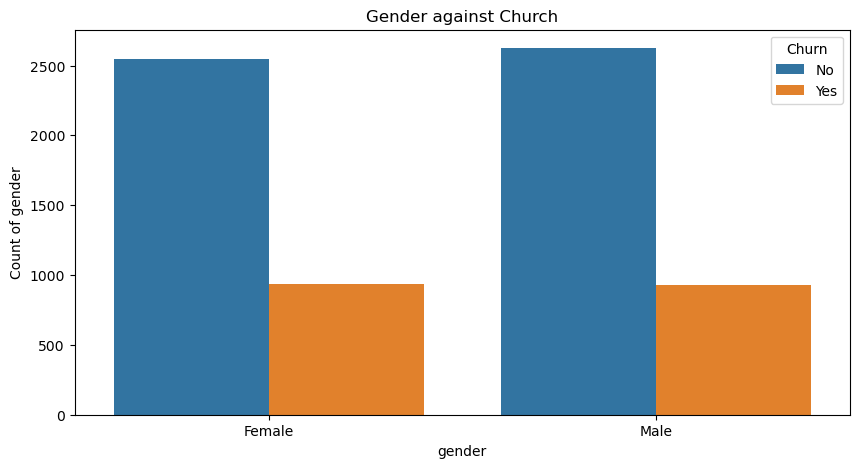

In [38]:
# Investigating the gender of customers by the target features (Churn)
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df, hue='Churn')
plt.xlabel('gender')
plt.ylabel('Count of gender')
plt.title('Gender against Church')

Text(0.5, 1.0, 'Citizens that churn the most')

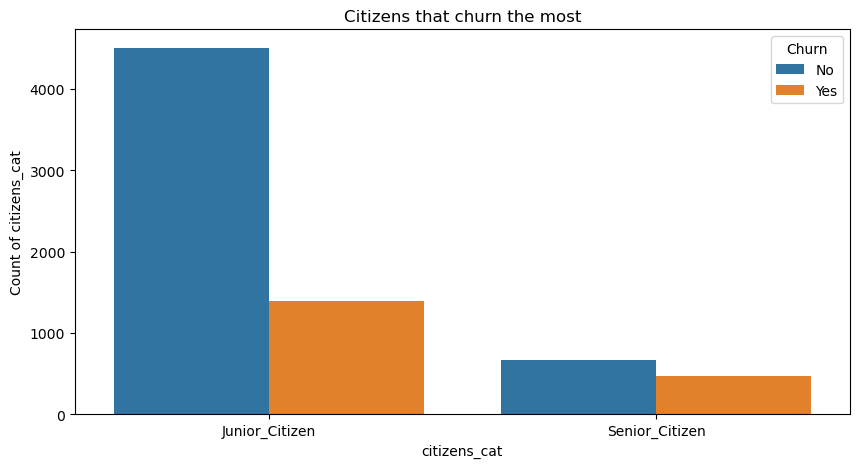

In [39]:
# Investigating the Citizens of customers by the target features (Churn)
plt.figure(figsize=(10,5))
sns.countplot(x='citizens_cat', data=df, hue='Churn')
plt.xlabel('citizens_cat')
plt.ylabel('Count of citizens_cat')
plt.title('Citizens that churn the most')

Text(0.5, 1.0, 'Customer Marital Status against Churn')

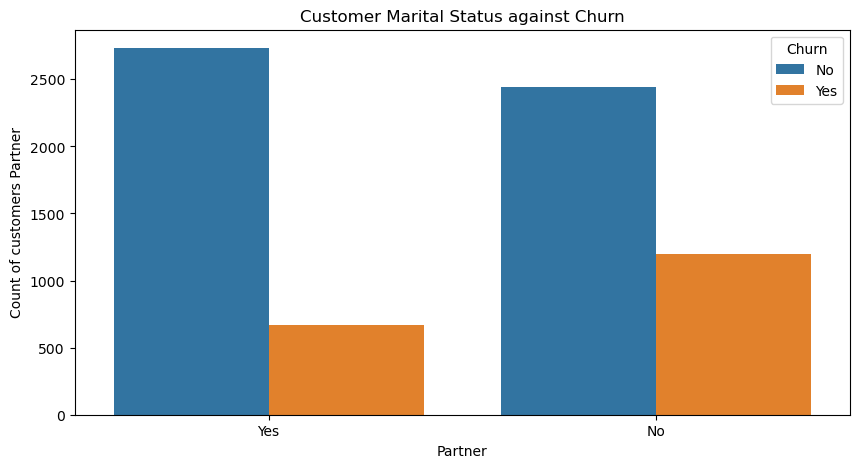

In [40]:
# Investigating the Citizens of customers by the target features (Churn)
plt.figure(figsize=(10,5))
sns.countplot(x='Partner', data=df, hue='Churn')
plt.xlabel('Partner')
plt.ylabel('Count of customers Partner')
plt.title('Customer Marital Status against Churn')

Text(0.5, 1.0, 'customers with MultipleLines against Churn')

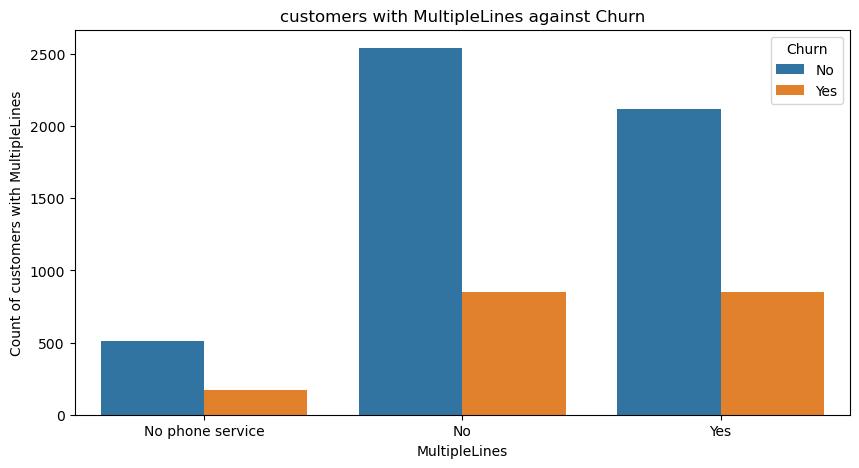

In [41]:
# Investigating the customers with MultipleLines by the target features (Churn)
plt.figure(figsize=(10,5))
sns.countplot(x='MultipleLines', data=df, hue='Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Count of customers with MultipleLines')
plt.title('customers with MultipleLines against Churn')

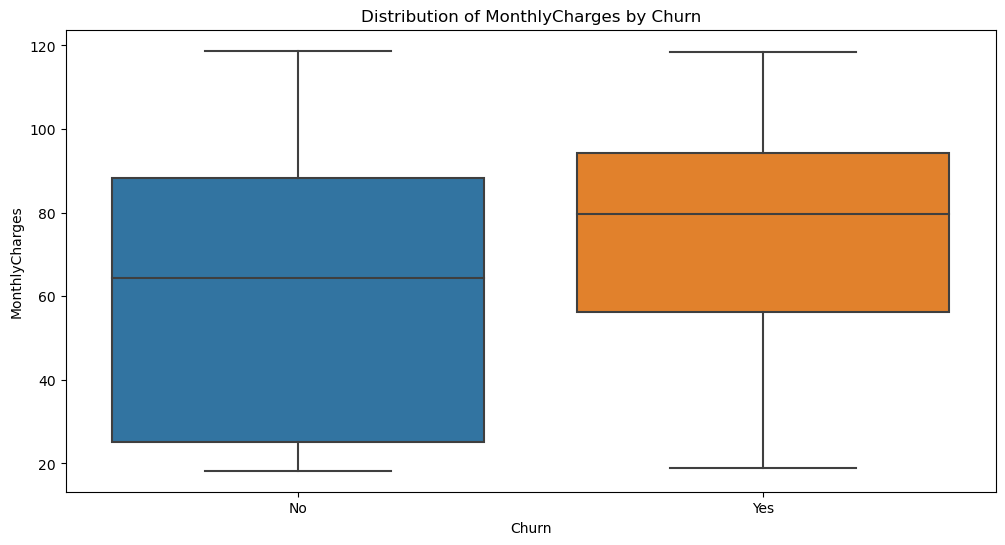

In [42]:
# Investigating the customers MonthlyCharges by the target features (Churn)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.title('Distribution of MonthlyCharges by Churn')
plt.show()

The box represents the interquartile range (IQR), with the median indicated by the line inside the box. No outliers detected

## Multivariate DAta Analysis

In [43]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<Axes: >

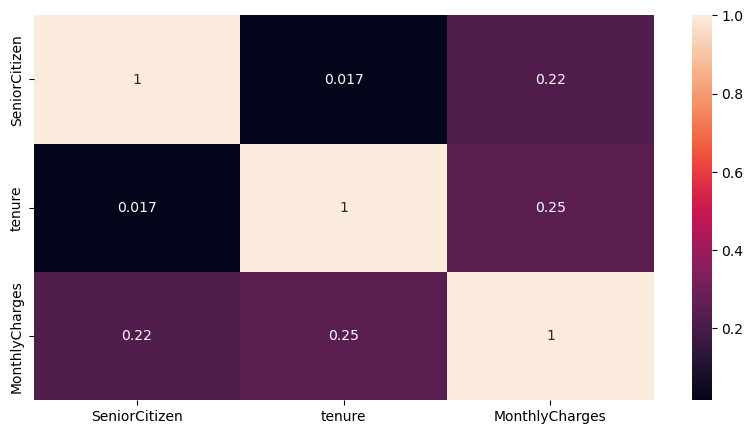

In [44]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)

## Feature Engineering/Data Pre-processing

In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,citizens_cat
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Junior_Citizen
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Junior_Citizen
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Junior_Citizen
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Junior_Citizen
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Junior_Citizen


In [50]:
df.drop("citizens_cat", axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### But we still have the problem of having categorical data in our datasets

#### we need to encode the categorical data to numerical data before we explore the analysis.

### Let's drop the created columns because we don't need them.

### Before encoding, let's create a new DataFrame



In [54]:
# Create a copy of the data and exlcude the columns created
#df1 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]
y = df['Churn']
df.drop(['Churn'], axis=1, inplace=True)


In [55]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [56]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


### Encoding of categorical features to numerical ones



In [57]:
# Label encoding for the target variable and the x variable
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

# Display the encoded values
y_encoded



array([0, 0, 1, ..., 0, 1, 0])

In [59]:
# Encode the x variable
df = pd.get_dummies(df)
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning

In [60]:
# Print column names
print(df.columns)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_996.95', 'TotalCharges_997.65', 'TotalCharges_997.75',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=6575)


In [63]:
print(y_encoded)

[0 0 1 ... 0 1 0]


In [64]:
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y_encoded, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5634, 6575)
X_test shape: (1409, 6575)
y_train shape: (5634,)
y_test shape: (1409,)


In [71]:
# List of classifiers
classifiers = [
    [XGBClassifier(), 'XGB Classifier'],
    [RandomForestClassifier(), 'Random Forest'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Decision tree'],
    [LogisticRegression(), 'Logistic Regression']
]

# Training and evaluating classifiers
for clf, clf_name in classifiers:
    # Training the classifier
    clf.fit(X_train, y_train)

    # Making predictions
    y_pred = clf.predict(X_test)

    # Making predictions
    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(X_test)[:, 1]
    else:
        # For classifiers that do not support predict_proba, use decision function
        y_prob = clf.decision_function(X_test)

    # Continue with other evaluation metrics
    roc_auc = roc_auc_score(y_test, y_prob)

    # Evaluating the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Printing the evaluation metrics
    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")



Classifier: XGB Classifier
Accuracy: 0.7899
Precision: 0.6215
Recall: 0.5282
F1-Score: 0.5710
AUC-ROC: 0.8325

Classifier: Random Forest
Accuracy: 0.7963
Precision: 0.6581
Recall: 0.4799
F1-Score: 0.5550
AUC-ROC: 0.8301

Classifier: SGD Classifier
Accuracy: 0.7339
Precision: 0.4984
Recall: 0.8338
F1-Score: 0.6239
AUC-ROC: 0.8554

Classifier: SVC
Accuracy: 0.8006
Precision: 0.7018
Recall: 0.4290
F1-Score: 0.5324
AUC-ROC: 0.8241

Classifier: Naive Bayes
Accuracy: 0.2803
Precision: 0.2588
Recall: 0.9223
F1-Score: 0.4042
AUC-ROC: 0.4857

Classifier: Decision tree
Accuracy: 0.7750
Precision: 0.5933
Recall: 0.4772
F1-Score: 0.5290
AUC-ROC: 0.6804

Classifier: Logistic Regression
Accuracy: 0.8219
Precision: 0.6906
Recall: 0.5925
F1-Score: 0.6378
AUC-ROC: 0.8586


## plot_confusion_matrix

In [75]:


pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.



Classifier: XGB Classifier
Accuracy: 0.7899
Precision: 0.6215
Recall: 0.5282
F1-Score: 0.5710
AUC-ROC: 0.8325

Classifier: Random Forest
Accuracy: 0.8048
Precision: 0.6856
Recall: 0.4853
F1-Score: 0.5683
AUC-ROC: 0.8381

Classifier: SGD Classifier
Accuracy: 0.8091
Precision: 0.6327
Recall: 0.6649
F1-Score: 0.6484
AUC-ROC: 0.8548

Classifier: SVC
Accuracy: 0.8006
Precision: 0.7018
Recall: 0.4290
F1-Score: 0.5324
AUC-ROC: 0.8241

Classifier: Naive Bayes
Accuracy: 0.2803
Precision: 0.2588
Recall: 0.9223
F1-Score: 0.4042
AUC-ROC: 0.4857

Classifier: Decision tree
Accuracy: 0.7750
Precision: 0.5933
Recall: 0.4772
F1-Score: 0.5290
AUC-ROC: 0.6804

Classifier: Logistic Regression
Accuracy: 0.8219
Precision: 0.6906
Recall: 0.5925
F1-Score: 0.6378
AUC-ROC: 0.8586


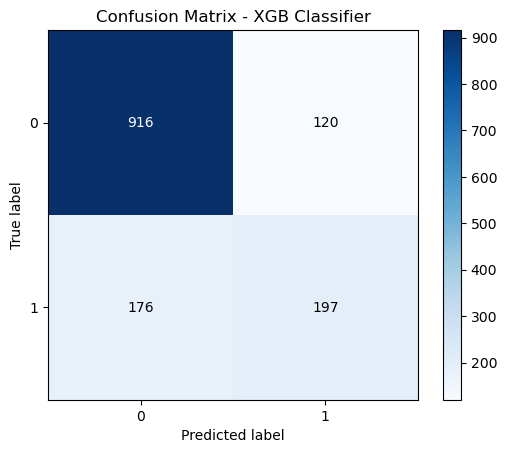

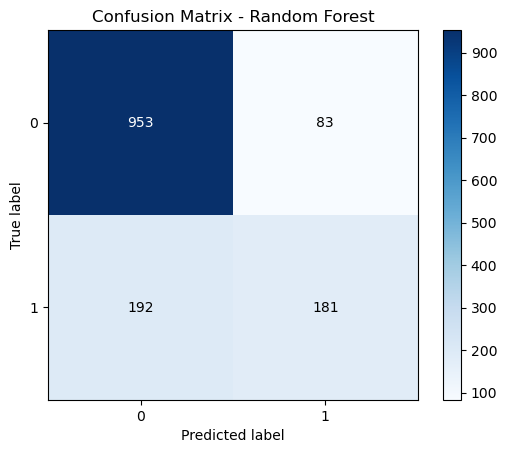

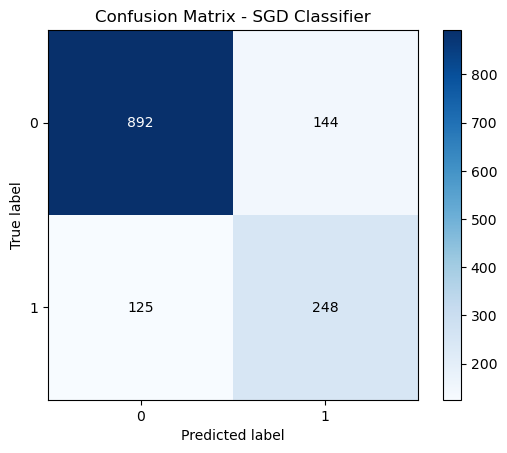

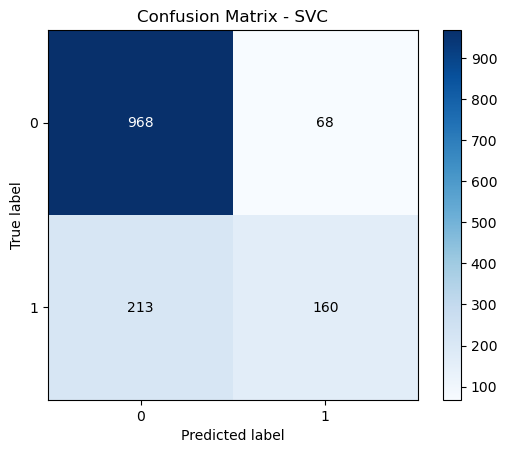

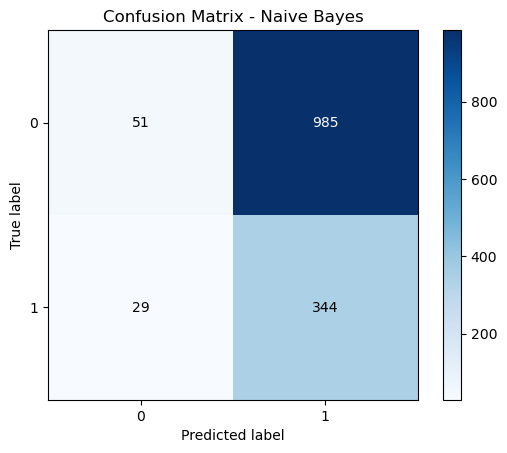

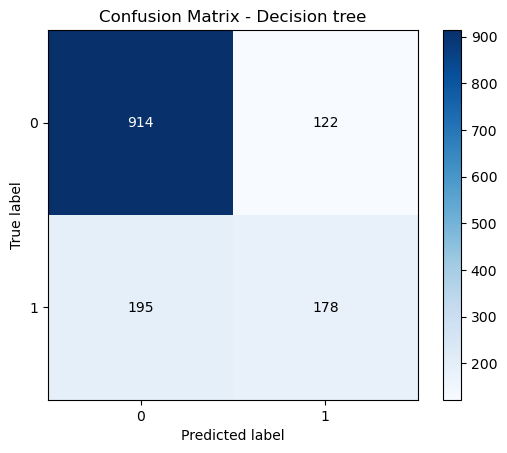

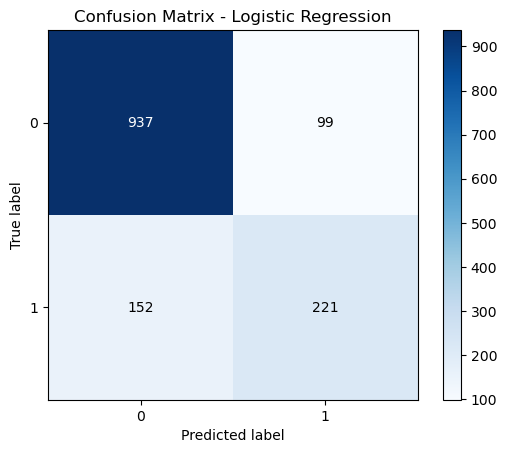

In [76]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix

# List of classifiers
classifiers = [
    [XGBClassifier(), 'XGB Classifier'],
    [RandomForestClassifier(), 'Random Forest'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Decision tree'],
    [LogisticRegression(), 'Logistic Regression']
]

# Training and evaluating classifiers
for clf, clf_name in classifiers:
    # Training the classifier
    clf.fit(X_train, y_train)

    # Making predictions
    y_pred = clf.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting the confusion matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title=f"Confusion Matrix - {clf_name}")
    
    # Other evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(X_test)[:, 1]
    else:
        y_prob = clf.decision_function(X_test)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Printing the evaluation metrics
    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")

# Show the plots
plt.show()


# Customer Data Overview:

Churn Distribution: The number of customers who churned (1869) is considerably lower than those who didn't (5174), indicating an imbalanced dataset.

Gender: There are slightly more male customers (3555) compared to female customers (3488).

Citizenship: Most customers are Junior Citizens (5901), with a smaller number being Senior Citizens (1142).

Partners and Dependents: The majority of customers don't have partners (3641) or dependents (4933).

Internet Service: Fiber optic is the most used internet service (3096), followed by DSL (2421), and some customers (1526) don't use internet services.

Payment Method: Electronic check is the most common payment method (2365), followed by Mailed check (1612), Bank transfer (automatic) (1544), and Credit card (automatic) (1522).

## Correlation Matrix:

SeniorCitizen vs. Tenure: Weak positive correlation (0.016567).

SeniorCitizen vs. MonthlyCharges: Moderate positive correlation (0.220173).

Tenure vs. MonthlyCharges: Moderate positive correlation (0.247900).

## Machine Learning Model Results:

#### XGB Classifier:
Accuracy: 78.99%
Precision: 62.15%
Recall: 52.82%
F1-Score: 57.10%
AUC-ROC: 83.25%

#### Random Forest:
Accuracy: 80.48%
Precision: 68.56%
Recall: 48.53%
F1-Score: 56.83%
AUC-ROC: 83.81%

#### SGD Classifier:
Accuracy: 80.91%
Precision: 63.27%
Recall: 66.49%
F1-Score: 64.84%
AUC-ROC: 85.48%

#### SVC:
Accuracy: 80.06%
Precision: 70.18%
Recall: 42.90%
F1-Score: 53.24%
AUC-ROC: 82.41%

#### Naive Bayes:
Accuracy: 28.03%
Precision: 25.88%
Recall: 92.23%
F1-Score: 40.42%
AUC-ROC: 48.57%

#### Decision Tree:
Accuracy: 77.50%
Precision: 59.33%
Recall: 47.72%
F1-Score: 52.90%
AUC-ROC: 68.04%
#### Logistic Regression:
Accuracy: 82.19%
Precision: 69.06%
Recall: 59.25%
F1-Score: 63.78%
AUC-ROC: 85.86%

## Confusion Matrix:

the figures shown above correctly displays the confusion matrix values:

True Positive (TP): The number of customers correctly predicted as churners.

True Negative (TN): The number of customers correctly predicted as non-churners.

False Positive (FP): The number of non-churners incorrectly predicted as churners.

False Negative (FN): The number of churners incorrectly predicted as non-churners.

In an imbalanced dataset like ours, accuracy alone might not be sufficient. Metrics like precision, recall, F1-score, and AUC-ROC provide a more comprehensive understanding of the model's performance, especially in identifying churn cases.

## Discussion:

#### XGB Classifier and Random Forest: 
These models have a good balance between precision and recall, making them suitable for identifying churn cases without sacrificing too much on precision.

#### SGD Classifier and Logistic Regression: 
These models perform well across the board, particularly in terms of recall. This is crucial for capturing a higher proportion of actual churn cases.

#### SVC: 
While having high precision, the recall is relatively low, indicating a higher number of false negatives.

#### Naive Bayes: 
The Naive Bayes model has low accuracy and precision, but very high recall. It might be identifying a lot of true churn cases but at the cost of many false positives.

#### Decision Tree: 
The decision tree performs decently but might be less robust compared to ensemble methods (Random Forest, XGB).


## Recommendations:
Depending on the cost of false positives and false negatives, we might want to prioritize models with higher precision or recall.

Ensemble models (like Random Forest and XGB) seem to provide a good balance between precision and recall.

Investigate further into why Naive Bayes has such high recall but low precision. This could help fine-tune the model or provide insights into customer behavior.
